<a href="https://colab.research.google.com/github/minseo0214/Titanic_Survivor/blob/master/Titanic_Survivor_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
os.listdir('/gdrive/My Drive/Titanic')

['.git',
 'README.md',
 'gender_submission.csv',
 'test.csv',
 'titanic-tutorial.ipynb',
 'train.csv',
 'Titanic_Survivor_Code.ipynb']

In [9]:
df_train = pd.read_csv('/gdrive/My Drive/Titanic/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/Titanic/test.csv')
df_submit = pd.read_csv('/gdrive/My Drive/Titanic/gender_submission.csv')

In [11]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [22]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

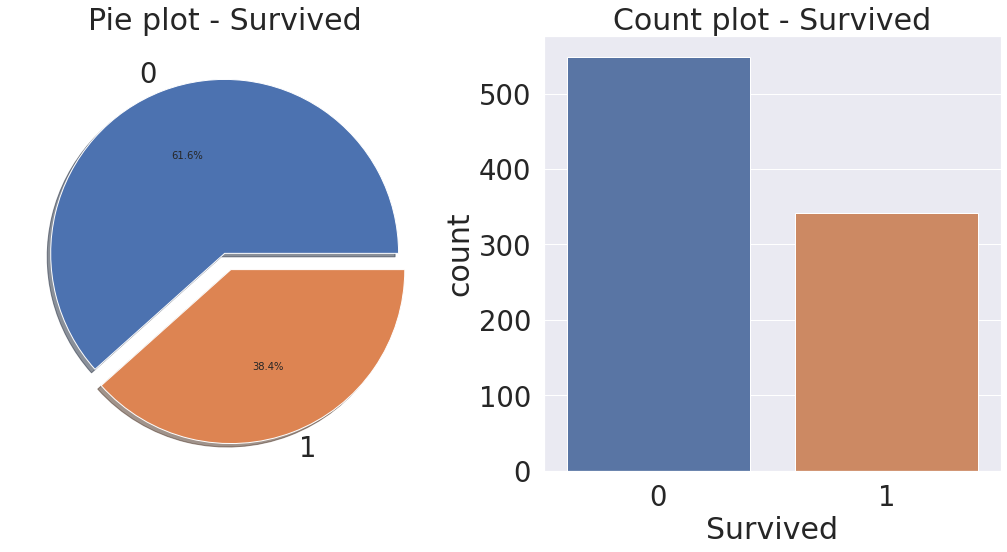

In [23]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct="%1.1f%%",ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

##탐색적 데이터 분석
2.1 Pcalss

In [25]:
#pclass 그룹별 데이터 카운트
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [26]:
#pclass 그룹 별 생존자 수 합
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [31]:
#crosstab으로 위의 표 합치기
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [32]:
#생존율 구하기
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


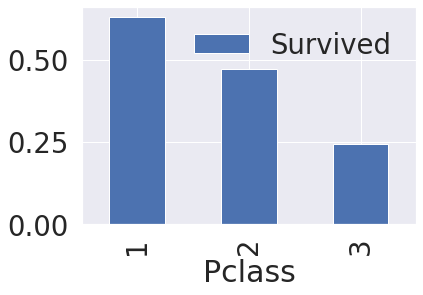

In [34]:
#시각화
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().plot.bar()
#Pclass가 생존에 큰 영향을 미침

2.2 Sex

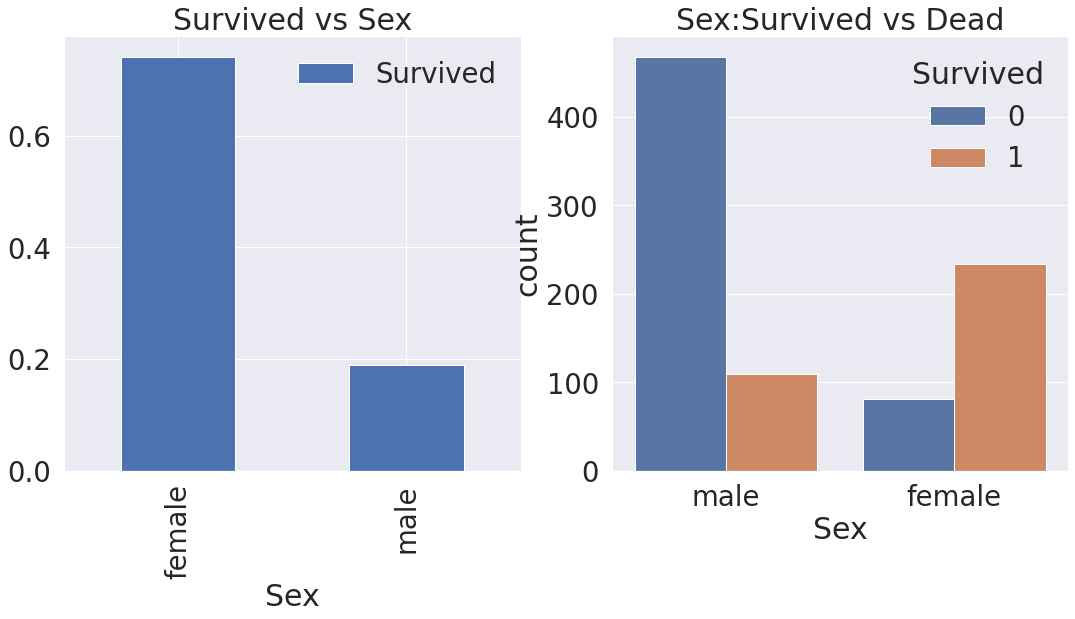

In [35]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여자 생존율이 더 높다
pclass와 마찬가지로, sex도 예측 모델에 쓰일 중요한 feature임.

2.3 Both Sex and Pclass

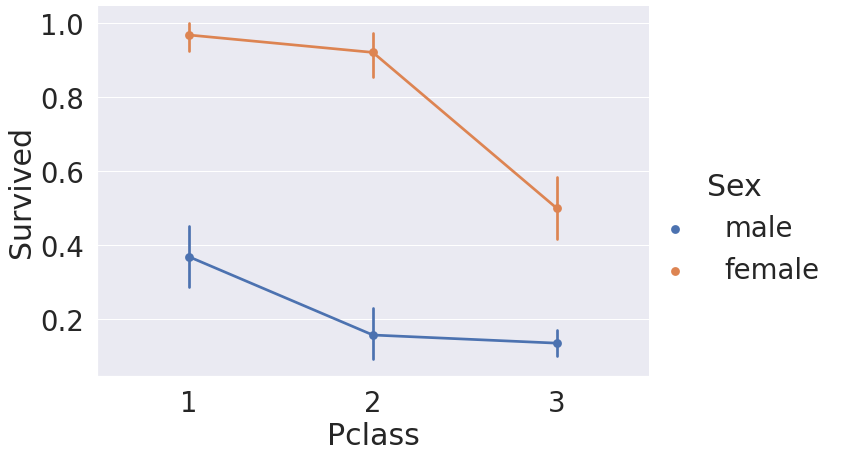

In [36]:
sns.factorplot('Pclass','Survived',hue = 'Sex', data=df_train,size=6,aspect=1.5)

모든 class에서 female이 살 확률이 male보다 더 높음

2.4 Age

In [37]:
print('Oldest : {:.1f} Years'.format(df_train['Age'].max()))
print('Toungest : {:.1f} Years'.format(df_train['Age'].min()))
print('Mean : {:.1f} Years'.format(df_train['Age'].mean()))

Oldest : 80.0 Years
Toungest : 0.4 Years
Mean : 29.7 Years


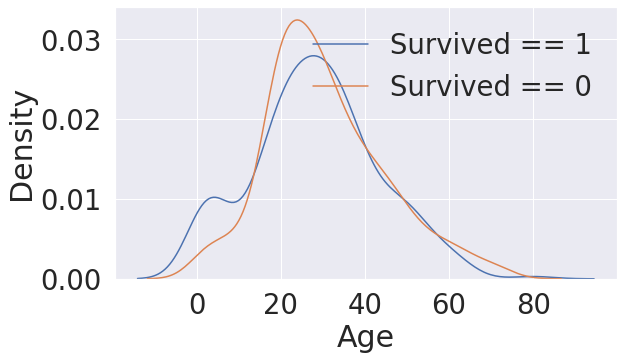

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

어린 나이 구간에서 생존률이 상대적으로 높음.

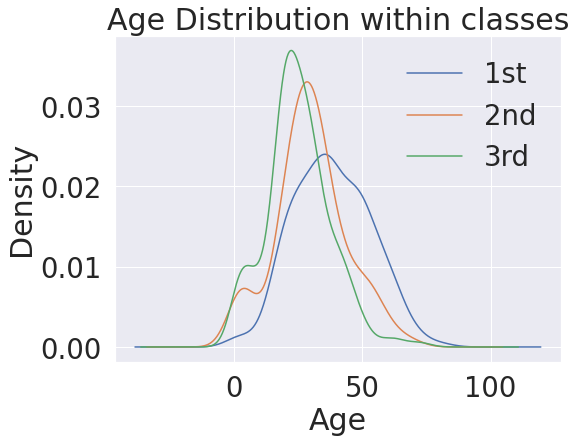

In [42]:
#나이 분표 withing classes
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st','2nd','3rd'])

클래스가 높아질수록, 나이 연령대가 높아짐.
나이대가 높아질 수록 생존 확률을 살펴보자자

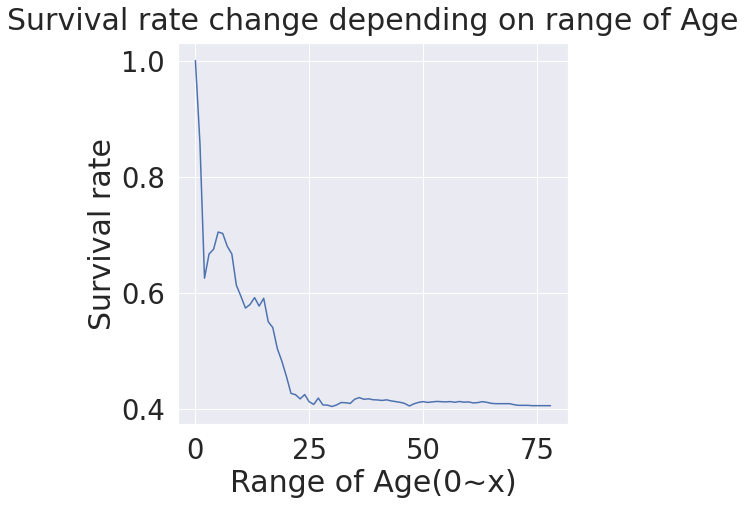

In [48]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() /len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize = (7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

어릴 수록 생존률이 확실히 높은 것을 확인가능
나이도 중요한 피쳐임

즉,


*   여자이거나
*   나이가 어리고
*   클래스가 높을 수록

생존률이 높음.


2.5 Embarked (탑승한 항구)

In [49]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

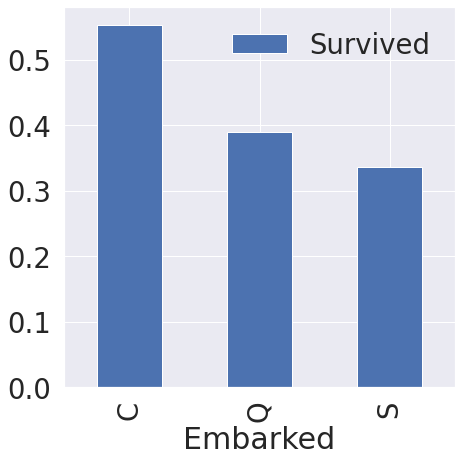

In [51]:
f, ax = plt.subplots(1,1,figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)


다른 feature들과의 상관관계를 봐보자자

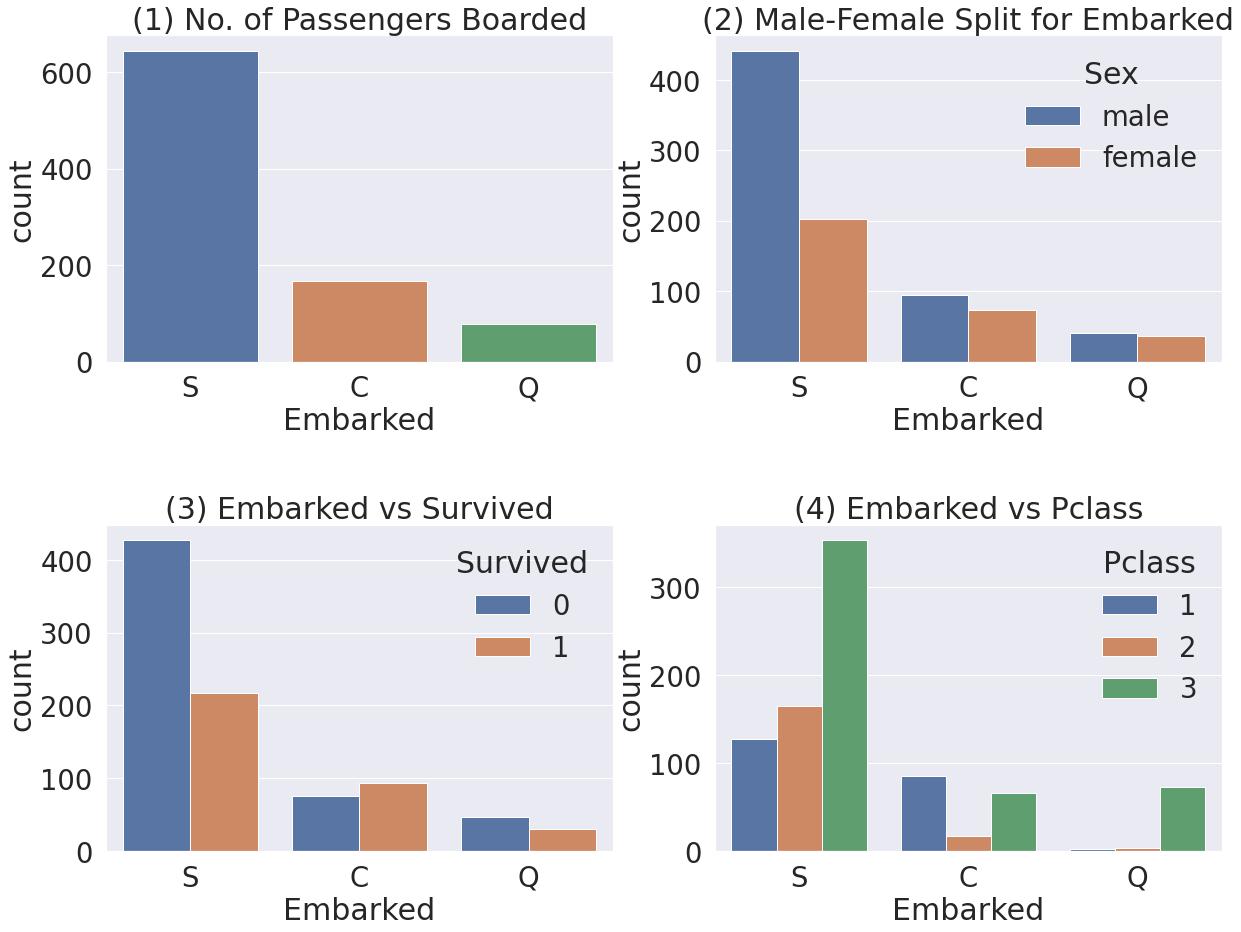

In [53]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data = df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue = 'Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue = 'Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

(1) S에서 가장 많은 사람이 탑승

(2) C와 Q는 남녀의 비율이 비슷하고, S는 \n남자가 더 많음

(3) 생존확률이 S의 경우 많이 낮음.

(4) C가 생존확률이 높았던 것은 클래스가 높은 사람이 많아서, S는 3rd class가 많아서 생존확률이 낮게 나옴.

2.6 가족관계 - 형제 자매, 부모 자녀

In [54]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #자기자신 포함

In [55]:
print('Max Family ',df_train['FamilySize'].max())
print('Max Family ',df_train['FamilySize'].min())

Max Family  11
Max Family  1


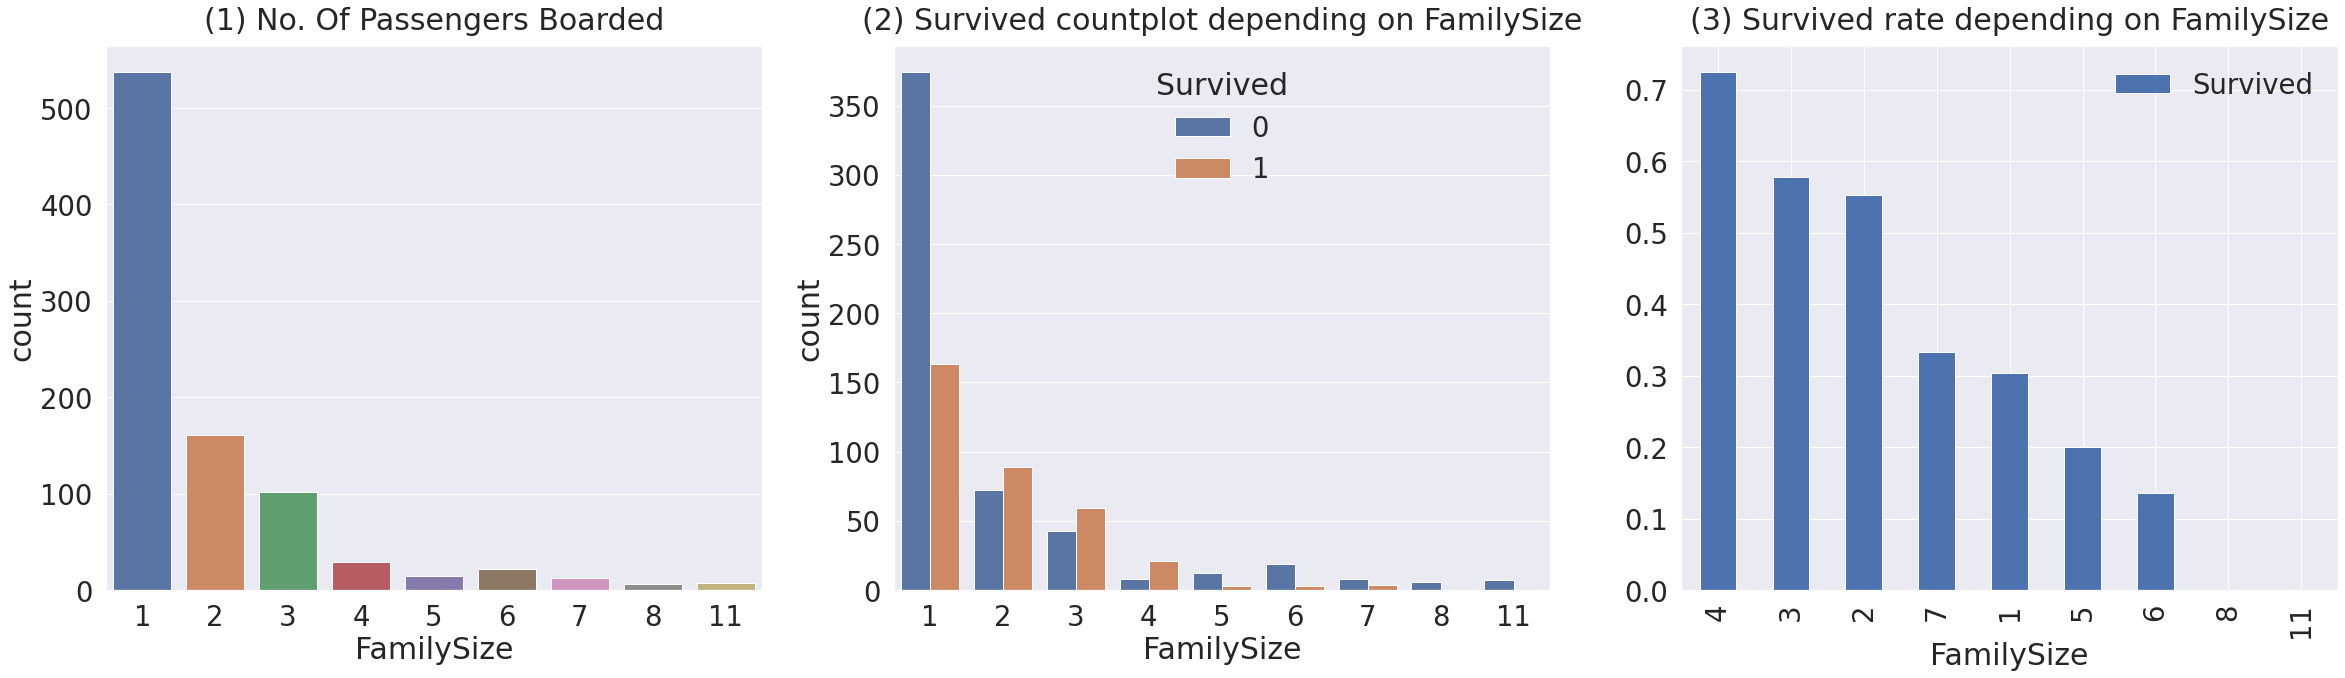

In [62]:
f, ax = plt.subplots(1, 3, figsize = (40,10))
sns.countplot('FamilySize',data = df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize',hue = 'Survived',data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



*   (1) 대부분 가족은 1명이고, 2,3,4명
*   (2),(3) 가족 크기에 따른 생존 비교 가족이 4명인 경우가 가장 생존확률이 높음
가족이 많아질수록 생족확률 낮아짐.(5,6,7,8,11)
가족이 너무 작아도 (1), 너무 커도(5,6,8,11) 생존 확률이 작음. 3~4명 선에서 생존확률이 높다.



2.7 Fare(탑승 요금)

연속적인 데이터이므로 histogram에 그리기

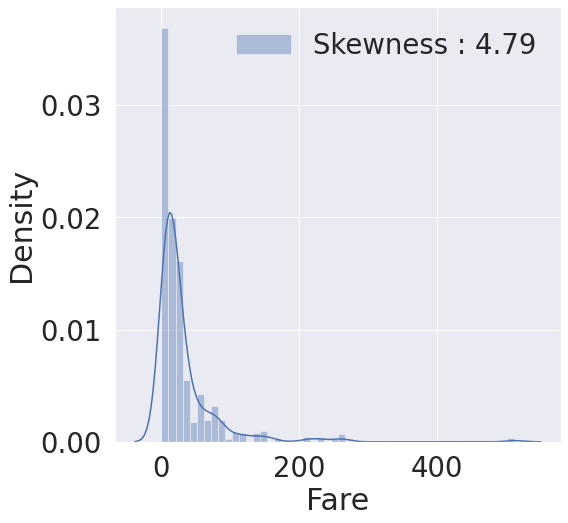

In [68]:
fig , ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

In [70]:
#train set말고 test set에 Fare 피쳐에 널 값이 하나 있는 것을 확인할 수 있었음.
#그래서 평균 값으로 해당 널 값을 넣어주기
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

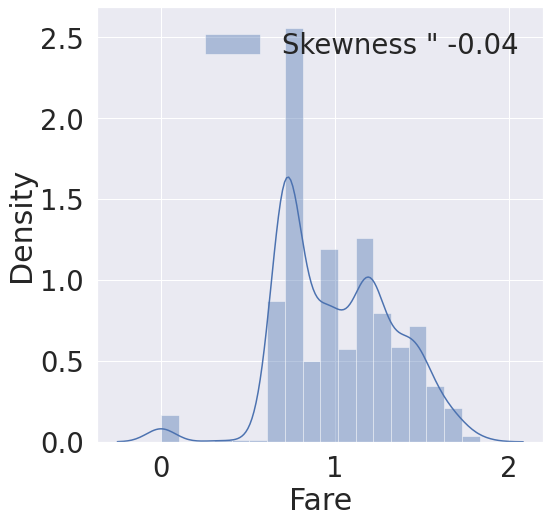

In [72]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness " {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc = 'best')

로그를 취하니, 비대칭성이 많이 사라짐

이런 작업을 사용해서 모델이 좀 더 좋은 성능을 낼 수 있도록 한다.

feature engineering 에 들어가는 부분이지만, 여기서 작엄

모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나 새로운 feature을 추가하는 것을 feature engineering 이라고 함.

다음 챕터에서 살펴볼것

2.8 Cabin

이 feature는 NaN이 80퍼센트이므로

생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지않아서

세우려는 모델에 포함시키지 않도록 함.

In [73]:
#Cabin 피쳐의 Null 비율 계산
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [74]:
df_train.head()[["PassengerId","Cabin"]] #선실

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


2.9 Ticket

이 feature은 NaN이 없음.
일단 stirng data이므로 우리가 어떤 작업들을 해주어야

실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요함.

In [75]:
df_train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
350404      1
19988       1
343120      1
2690        1
349216      1
Name: Ticket, Length: 681, dtype: int64

Ticket number들이 다양함

우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬지는

한번 생각해보고 새로운 Feature을 만들어서
모델의 성능을 끌어올리는 것도 데이터 분석 과정 중 하나임!!

내 생각

같은 티켓인 사람은 같은 곳에서 산것일까?

### 3. 특성공학 (Feature Engineering)

본격적인 feature engineering 을 시작해보겠습니다.

"Garbage In, Garbage out"

특성 공학을 통해 다양 피쳐를 만드시고, 정제하실 텐데
자기가 생각한 가정이 항상 타당한지 생각하시고 진행해 주시길 바랍니다!
아무리 좋은 모델도, 안좋은 데이터가 들어오면 안좋은 결과로 나오기 마련이니까요.

가장 먼저, dataset 에 존재하는 null data를 채우려고 합니다.
아무 숫자로 채울 수는 없고, null data 를 포함하는 feature 의 statistics 를 참고하거나,
다른 아이디어를 짜내어 채울 수 있습니다.

null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.

특히, Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로,
train 뿐만 아니라 test 도 똑같이 적용해주어야 합니다. 잊지맙시다.

3.1 Fill Null

3.1.1 Fill Null in Age using title

In [76]:
df_train["Age"].isnull().sum()

177

Age에 null data가 177개임

이를 채울 수 있는 아이디어는 많은 것이다.

여기서는 title + statistics를 사용해보자

영어에서는 Miss, Mrr, Mrs 같은 title이 존재한다.

각 탑승객의 이름에는 꼭 이런 title이 들어가게 되는데 이를 사용하도록함.

pandas series 에는 data를 string으로 바꿔주는 str method

거기에 정규 표현식을 적용하게 해주는 extract method가 있다.

이를 사용하여 title을 쉽게 추출할 수 있다.

title을 Initial column에 저장

In [97]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

crosstab을 이용하여 추출한 initial과 set간의 count를 살펴보기.

이름일 잘못적혀져있거나,
성별을 잘 못 분류했을수도 있음

In [98]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [92]:
print(len(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir']))
print(len(['Mr','Other','Other','Mr','Mr','Other','Miss','Mr','Miss','Miss','Miss',"Other","Mr"]))

13
13


In [100]:
#잘못적힌 이름들 하나하나 치기
df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','MR'],
                            ['Mr','Other','Mrs','Mr','Mr','Other','Mrs','Mr','Miss','Miss','Miss',"Other","Mr",'Mr'],inplace=True)
df_test['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','MR'],
                            ['Mr','Other','Mrs','Mr','Mr','Other','Mrs','Mr','Miss','Miss','Miss',"Other","Mr",'Mr'],inplace=True)

In [101]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


잠깐 git commit을 하자